<a href="https://colab.research.google.com/github/Abhishekpratapsingh321/Income_census_prediction/blob/main/income_census_dataset_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing important libraries

In [1]:
from google.colab import files
import io
import requests
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,8]
import pdb
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

Feature Information:

1:  age: continuous.

2:  workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, 
State-gov, Without-pay, Never-worked.

3:  fnlwgt: continuous.

4:  education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

5:  education-num: continuous.

6:  marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

7:  occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

8:  relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

9:  race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

10:  sex: Female, Male.

11:  capital-gain: continuous.

12:  capital-loss: continuous.

13:  hours-per-week: continuous.

14:  native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

15:  income: >50K, <=50K.


Loading Training Dataset and creating dataframe

In [2]:

df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain',	'capital-loss',	'hours-per-week',	'native-country',	'income'])


Loading Test Dataset and creating Dataframe

In [3]:
df_test=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test",names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain',	'capital-loss',	'hours-per-week',	'native-country',	'income'])


In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [6]:
df_test=df_test.drop([0],axis=0) #here we are dropping the first row as its is in wrong format

In [7]:
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df_test.info() #here we can see that age datatype is object so we have to convert it into int64 form

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16281 entries, 1 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             16281 non-null  object 
 1   workclass       16281 non-null  object 
 2   fnlwgt          16281 non-null  float64
 3   education       16281 non-null  object 
 4   education-num   16281 non-null  float64
 5   marital-status  16281 non-null  object 
 6   occupation      16281 non-null  object 
 7   relationship    16281 non-null  object 
 8   race            16281 non-null  object 
 9   sex             16281 non-null  object 
 10  capital-gain    16281 non-null  float64
 11  capital-loss    16281 non-null  float64
 12  hours-per-week  16281 non-null  float64
 13  native-country  16281 non-null  object 
 14  income          16281 non-null  object 
dtypes: float64(5), object(10)
memory usage: 2.0+ MB


In [10]:
df_test['age']=pd.to_numeric(df_test['age'])

# EDA step

## Training dataset

Types of features




*   Numerical features (6 features, int64): age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week

*   Categorical features (9 features, object(str)): workclass, education, marital-status, occupation, relationship, race, sex, native-country, income



Missing Data



*   There are no null data in any of the dataset columns.

*   However, there are unknown data (information) in some columns indicated by the symbol '?'.



In [11]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

## Testing Dataset

Missing data:



*  There are no null data in any of the dataset columns.

*  However, there are missing or wrong data in some columns indicated by the symbol '?'. 



This dataset will be only used in the testing step to evaluate the performance of the proposed ML models trained over the train dataset in the training step.

In [13]:
df_test.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [14]:
df_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

##    Feature analysis

The analysis conducted in this block are performed on the training dataset, which will be used to fit the ML models.

### Target feature **income**

It defines whether a person makes over $50K a year (class >50K) or not (class <=50) based on census data.

In [15]:
def categorical_feature_analysis(df, var_name):
  ##var_name is the feature to be analyzed
  print('Data values by class of feature %s:\n%s\n' % (var_name, df[var_name].value_counts(dropna=False))) #total feature values by category
  print('Percentage of data values by class of feature %s:\n%s\n' % (var_name, df[var_name].value_counts(normalize=True, dropna=False))) #percentage of total feature values by category
  print('Unique values of feature %s:\n%s\n'  % (var_name, df[var_name].unique())) #feature's unique values

In [16]:
var='income'
categorical_feature_analysis(df, var)

Data values by class of feature income:
 <=50K    24720
 >50K      7841
Name: income, dtype: int64

Percentage of data values by class of feature income:
 <=50K    0.75919
 >50K     0.24081
Name: income, dtype: float64

Unique values of feature income:
[' <=50K' ' >50K']



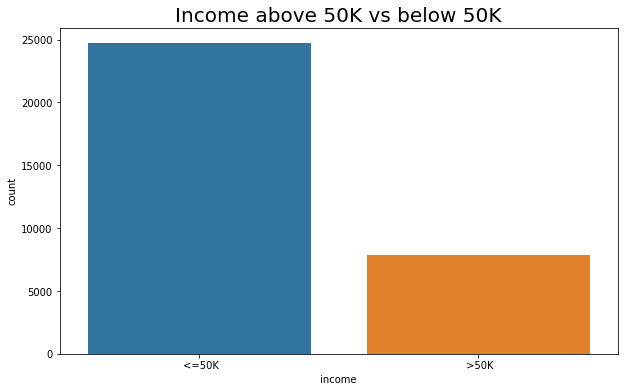

In [17]:
##plot distribution
plt.figure(figsize=(10,6))
plt.title("Income above 50K vs below 50K", fontsize=20)
ax = sns.countplot(x='income', data=df)




*   Unbalanced data values, where 76% (24720) of people make less or equal to  a year, and 24% (7841) of people make over  a year.

*     Such imbalance might be caused by specific features that tend to influence the increase/decrease the annual income more significantly. For example, feature age may reflect on work experience and seniority of the position.

In [18]:
def continuous_feature_analysis(df, var_name):
  ##var_name is the feature to be analyzed
  print('Distribution of data values of feature %s:\n%s\n' % (var_name, df[var_name].value_counts(dropna=False))) #distribution of feature values
  print('Percentage of data distribution of feature %s:\n%s\n' % (var_name, df[var_name].value_counts(normalize=True, dropna=False))) #percentage of distribution of feature values
  #print('Unique values of feature %s (sorted) (%i):\n%s\n'  % (var_name, len(df[var_name].unique()), sorted(df[var_name].unique()))) #feature's unique values
  print('Total unique values of feature %s: %i\n'  % (var_name, len(df[var_name].unique()))) #feature's unique values
  display(df[var].describe())

### Feature **age**

In [19]:
var='age'
continuous_feature_analysis(df, var)

Distribution of data values of feature age:
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64

Percentage of data distribution of feature age:
36    0.027579
31    0.027272
34    0.027210
23    0.026934
35    0.026903
        ...   
83    0.000184
88    0.000092
85    0.000092
86    0.000031
87    0.000031
Name: age, Length: 73, dtype: float64

Total unique values of feature age: 73



count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

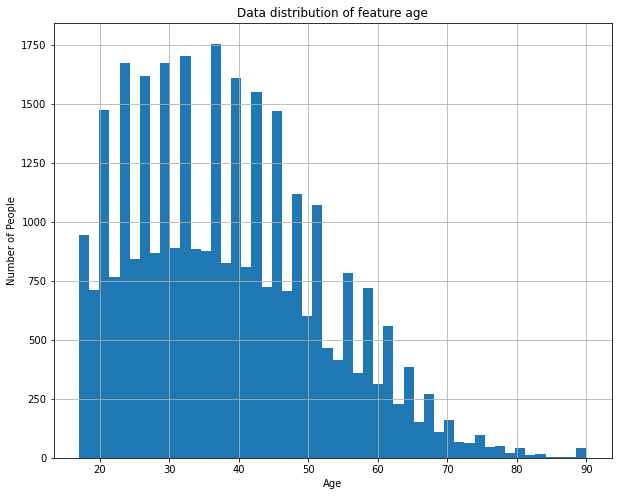

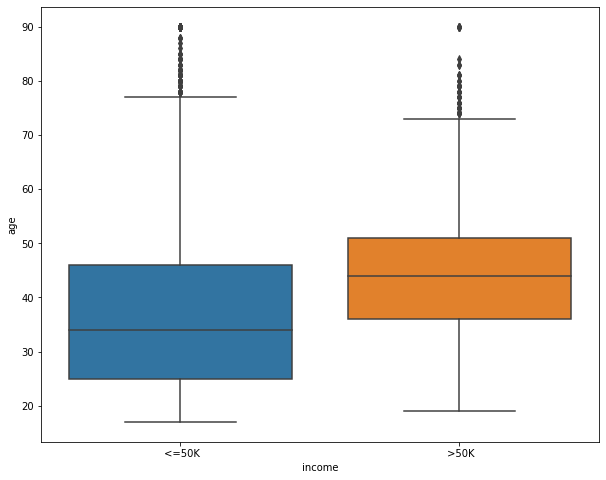

In [20]:
ax=df[var].hist(bins=50)
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Number of People')
ax.set_xlabel('Age')
plt.show()

sns.boxplot(y='age', x='income', data=df)
plt.show()

*   Numerical feature with values ranging from 17 to 90 years.
*   Unbalanced data distribuiton, with greater concentration of people aged between 28 and 48 years.
*   Age values present an average of 38.58 years and median of 37 years.
*   25% of people are under 28 years old and 75% of people have less than 48 years old.
*   Regarding the relationship between ages and incomes, we note that older   people tend to make over $50k a year, whereas younger people tend to make less or equal to $50k

###  Feature **fnlwgt**
It represents the estimated final weight of each person assigned by the Census Bureau. The weight means that if two samples share similar fnlwgt, they also share similar characteristics.

In [21]:
var='fnlwgt'
continuous_feature_analysis(df, var)

Distribution of data values of feature fnlwgt:
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64

Percentage of data distribution of feature fnlwgt:
164190    0.000399
203488    0.000399
123011    0.000399
148995    0.000369
121124    0.000369
            ...   
232784    0.000031
325573    0.000031
140176    0.000031
318264    0.000031
257302    0.000031
Name: fnlwgt, Length: 21648, dtype: float64

Total unique values of feature fnlwgt: 21648



count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

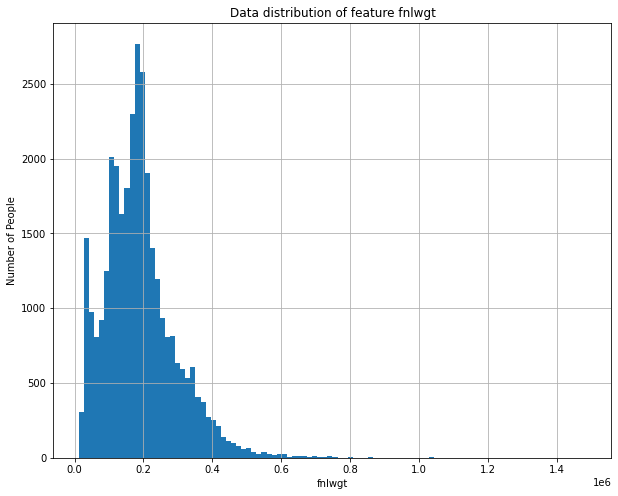

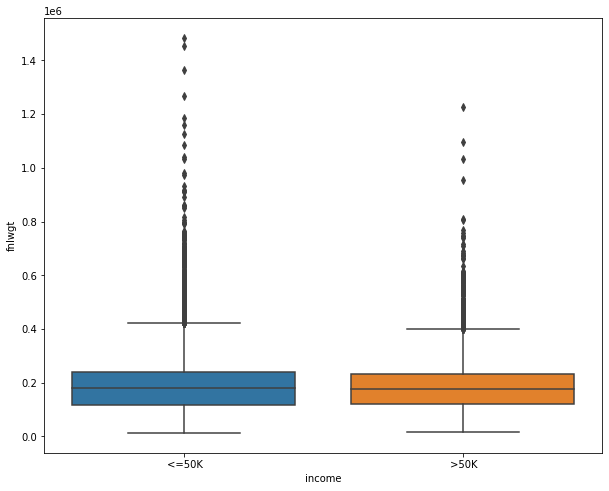

In [22]:
ax=df[var].hist(bins=100)
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Number of People')
ax.set_xlabel('fnlwgt')
plt.show()

sns.boxplot(y='fnlwgt', x='income', data=df)
plt.show()

*   Numerical feature with large scale values, and almost a distinct value to each person.

* No missing or null data.

* Regarding the relationship between features fnlwgt and income, we note that the boxplots for both classes of the target feature regarding the data distribution of fnlwgt did not show notable differences.

* This may indicate that fnlwgt is not so useful for the model.

* We also note outliers in both classes of the target regarding the values of fnlwgt.

Feature **education**

In [23]:
var="education"
categorical_feature_analysis(df,var)

Data values by class of feature education:
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

Percentage of data values by class of feature education:
 HS-grad         0.322502
 Some-college    0.223918
 Bachelors       0.164461
 Masters         0.052916
 Assoc-voc       0.042443
 11th            0.036086
 Assoc-acdm      0.032769
 10th            0.028654
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013298
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: education, dtype: float64

Unique values of feature education:
[' Bachelors' ' 

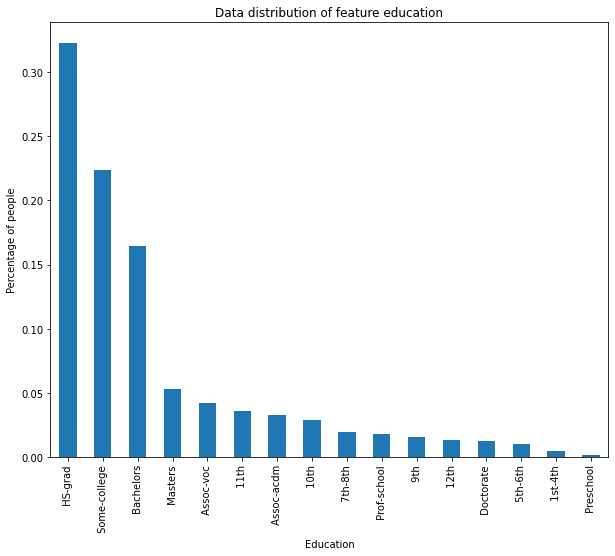

In [24]:
##plot distribution
ax=df[var].value_counts(normalize=True).plot.bar()
ax.set_title('Data distribution of feature '+var)
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Education')
ax.set_xticklabels(labels=[' HS-grad', ' Some-college', ' Bachelors', ' Masters', ' Assoc-voc', ' 11th', ' Assoc-acdm', ' 10th', ' 7th-8th', ' Prof-school', ' 9th', ' 12th', ' Doctorate', ' 5th-6th', ' 1st-4th', ' Preschool'])
plt.show()


Percentage of people with HS-grad that makes >$50K/yr:  5.144190903227788
Percentage of people with some college degree that makes >$50K/yr:  0.0
Percentage of people with bachelors that makes >$50K/yr:  6.821043579742637
Percentage of people with doctorate degree that makes >$50K/yr:  0.9397745769478825


income,<=50K,>50K
education,,
10th,0.933548,0.066452
11th,0.948936,0.051064
12th,0.923788,0.076212
1st-4th,0.964286,0.035714
5th-6th,0.951952,0.048048
7th-8th,0.938080,0.061920
9th,0.947471,0.052529
Assoc-acdm,0.751640,0.248360
Assoc-voc,0.738784,0.261216


Text(0, 0.5, 'Percentage of People (normalized by class)')

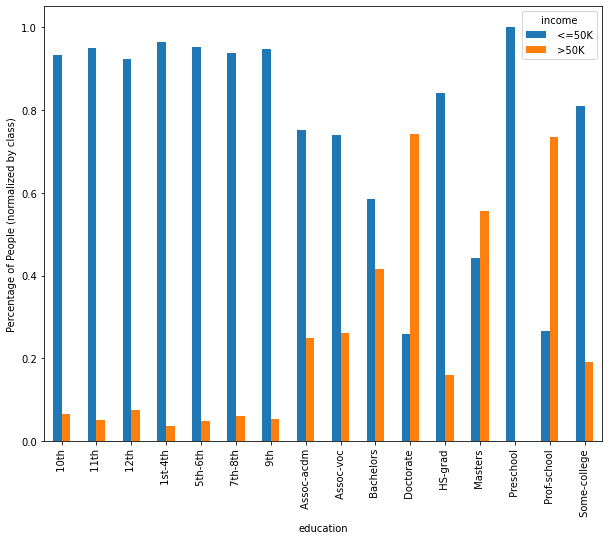

In [25]:
print('Percentage of people with HS-grad that makes >$50K/yr: ', len(df[(df['education']==' HS-grad') & (df['income']==' >50K')])/len(df)*100)
print('Percentage of people with some college degree that makes >$50K/yr: ', len(df[(df['education']=='Some-college') & (df['income']==' >50K')])/len(df)*100)
print('Percentage of people with bachelors that makes >$50K/yr: ', len(df[(df['education']==' Bachelors') & (df['income']==' >50K')])/len(df)*100)
print('Percentage of people with doctorate degree that makes >$50K/yr: ', len(df[(df['education']==' Doctorate') & (df['income']==' >50K')])/len(df)*100)

#pd.crosstab([train_data['education'], train_data['workclass']], train_data['income'], normalize='index')
display(pd.crosstab([df['education']], df['income'], normalize='index'))

pd.crosstab([df['education']], df['income'], normalize='index').plot.bar()
plt.ylabel('Percentage of People (normalized by class)')